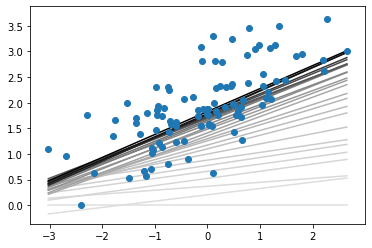

In [67]:
import numpy as np 
import matplotlib.pyplot as plt 


#random generating seed value 
np.random.seed(42) 

"""
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of actual outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
"""

def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]

    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = SquaredErrorStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef

#quared trick at every point in our data all at the same time, and repeating this process many times.
# gradient decent step for squared error 
# Y = w0 + w1x
# w0 : y intercept 
# w1 : slop 
# y : array of actual outcome values
# X : array of predictor features

def SquaredErrorStep(X, y, w1, w0, learn_rate = 0.001):
    # compute errors
    y_pred = w0 + np.matmul(X, w1)
    error = y - y_pred

    # https://github.com/shohan4556/machine-learning-course-notes/blob/master/Jupyter-Notebook/Regression/Linear%20Regression.ipynb
    # compute steps
    w1_new = w1 + learn_rate * np.matmul(error, X)
    w0_new = w0 + learn_rate * error.sum()
    return w1_new, w0_new



def main():
    #load dataset 
    data = np.loadtxt('data.csv', delimiter=',')
    X = data[:,:-1]
    y = data[:,-1]
    
    #print(X.shape)
    #print(y.shape)

    regression_coef = miniBatchGD(X, y)
    
    
    plt.figure()
    X_min = X.min()
    X_max = X.max()

    counter = len(regression_coef)

    #unpack slop (w0) and intercept (w0)
    for W, b in regression_coef:
        counter -= 1
        color = [1 - 0.92 ** counter for _ in range(3)]
        plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
    plt.scatter(X, y, zorder = 3)
    plt.show()


main()
